$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

We take the initial choice of B, $B_0$
 as the identity matrix or a scalar multiple of identity matrix as it is a symmetric positive definite matrix

In [ ]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.009303274999979294


In [ ]:
def evalf(x):
  sum = 0
  for i in range(len(x)-1):
    sum += (4*(x[i]**2-x[i+1])**2 + (x[i] - 1)**2)
  return sum

In [ ]:
def evalg(x):
  n = len(x)
  grad = np.array([16*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1)])
  for i in range(1,n-1):
    grad = np.append(grad, (-8*(x[i-1]**2 - x[i]) + 16*x[i]*(x[i]**2 - x[i+1]) + 2*(x[i]-1)))
  grad = np.append(grad, (-8*(x[n-2]**2 - x[n-1])))

  return grad.reshape(n,1)

In [ ]:
def evalh(x):
  n = len(x)
  hes = np.zeros((n,n))
  hes[0][0] = 16*(3*x[0]**2 - x[1]) + 2
  hes[0][1] = -16*x[0]

  for i in range(1,n-1):
    hes[i][i-1] = -16*x[i-1]
    hes[i][i] = 16*(3*(x[i]**2)-x[i+1]) + 10
    hes[i][i+1] = -16*x[i]
  
  hes[n-1][n-2] = -16*x[n-2]
  hes[n-1][n-1] = 8

  return hes

In [ ]:
def compute_steplength_backtracking(x, gradf, B, alpha_start, rho, gamma):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start

  while evalf(x+alpha*-np.matmul(B,gradf)) > evalf(x) + gamma*alpha*np.matmul(gradf.transpose(),-np.matmul(B,gradf)):
    alpha = rho*alpha

  return alpha

In [ ]:
def BFGS(n, tol, *args):
  x1 = np.zeros(n).reshape(n,1)
  grad_f = evalg(x1)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  I = np.identity(n)

  B = I#np.linalg.inv(evalh(x1))

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 3000:
    alpha = compute_steplength_backtracking(x1, grad_f, B, alpha, rho, gamma)
    x2 = np.add(x1, np.multiply(alpha,np.matmul(B,-grad_f)))
    s = x2 - x1
    y = evalg(x2) - evalg(x1)
    mu = 1/np.matmul(y.transpose(),s)
    #print(p,alpha,x2,s,y,mu)
    B = np.add(np.matmul(np.matmul(np.subtract(I,np.matmul(np.multiply(mu,s),y.transpose())),B),np.subtract(I,np.matmul(np.multiply(mu,y),s.transpose()))),np.matmul(np.multiply(mu,s),s.transpose()))
    x1 = x2
    grad_f = evalg(x2)
    k = k+1
    #if k%10 == 0:
      #print('For k values which are divisible by 10:')
      #print(k, 'is divisible by 10,', 'grad:', np.linalg.norm(grad_f))
  return k, x1, evalf(x1)

In [ ]:
n = [1000,2500,5000]
iters=[]
time_taken=[]
for i in n:
  s_t = timer()
  k, x1, f = BFGS(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  total_time = e_t - s_t
  iters.append(k)
  time_taken.append(total_time)
  print('For n =',i)
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:',e_t-s_t)
  print('************************************************')


For n = 1000
Iterations: 76
Optimizer: [[1.00000048]
 [1.00000075]
 [1.00000096]
 [1.00000109]
 [1.00000122]
 [1.00000128]
 [1.00000129]
 [1.00000131]
 [1.00000133]
 [1.00000146]
 [1.00000153]
 [1.0000015 ]
 [1.00000135]
 [1.0000012 ]
 [1.00000108]
 [1.00000122]
 [1.00000135]
 [1.00000148]
 [1.00000151]
 [1.00000142]
 [1.00000128]
 [1.00000127]
 [1.00000128]
 [1.00000136]
 [1.00000143]
 [1.00000145]
 [1.00000139]
 [1.00000137]
 [1.00000137]
 [1.00000137]
 [1.00000139]
 [1.00000132]
 [1.00000128]
 [1.00000127]
 [1.00000141]
 [1.00000155]
 [1.0000017 ]
 [1.00000169]
 [1.00000162]
 [1.00000145]
 [1.00000144]
 [1.00000152]
 [1.00000169]
 [1.00000181]
 [1.00000184]
 [1.00000157]
 [1.00000135]
 [1.00000108]
 [1.00000105]
 [1.00000114]
 [1.00000143]
 [1.00000157]
 [1.00000156]
 [1.00000162]
 [1.00000127]
 [1.00000138]
 [1.00000126]
 [1.00000156]
 [1.00000144]
 [1.00000152]
 [1.00000131]
 [1.00000122]
 [1.00000146]
 [1.00000162]
 [1.0000014 ]
 [1.0000013 ]
 [1.0000014 ]
 [1.00000135]
 [1.00000

In [ ]:
print(iters)

[76, 82, 176]


In [ ]:
for i in [7500, 10000]:
  print('For n =',i)
  s_t = timer()
  k, x1, f = BFGS(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  total_time = e_t - s_t
  iters.append(k)
  time_taken.append(total_time)
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:', total_time)

For n = 7500
Iterations: 174
Optimizer: [[1.00000005]
 [0.99999941]
 [0.99999943]
 ...
 [0.99987772]
 [0.99972626]
 [0.99940526]]
Optimal Function Value: [1.22834152e-07]
Time taken: 10300.193633628
For n = 10000


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
n1 = [1000, 2500, 5000, 7500]
total_time = [37.42666279299999, 232.58380976799998, 3274.633937278 , 10300.193633628]
iters = [76, 82, 176, 174]
bfgs_table = pd.DataFrame({'N': n1, 'Time_taken_bfgs(sec)': total_time, 'Iterations': iters} )
bfgs_table

,N,Time_taken_bfgs(sec),Iterations
0,1000,37.426663,76
1,2500,232.583810,82
2,5000,3274.633937,176
3,7500,10300.193634,174


$\Large\text{For n=10000, the code was not running even fro leaving for 5 hours, so, I stopped the code.}$

In [ ]:
#copied from last lab
def compute_steplength_backtracking_scaled_direction(x, p, gradf, alpha_start, rho, gamma, d_k):
  #assert type(x) is np.ndarray and len(x) == 2
  #assert type(gradf) is np.ndarray and len(gradf) == 2
  
  alpha = alpha_start
  
  while evalf(x+alpha*np.matmul(d_k,p)) > evalf(x) + gamma*alpha*(np.matmul(gradf.transpose(),np.matmul(d_k,p))):
    alpha = rho*alpha
  
  if alpha > 1e-5:
    return alpha
  else:
    return 1e-5

In [ ]:
def newton_algo(n, tol, *args):
  x = np.zeros(n).reshape(n,1)
  grad_f = evalg(x)

  alpha = args[0]
  rho = args[1]
  gamma = args[2]

  hes_f = evalh(x)

  k = 0

  while np.linalg.norm(grad_f) > tol and k < 10000:
    p = -grad_f
    d = np.linalg.inv(hes_f)
    step_length = compute_steplength_backtracking_scaled_direction(x, p, grad_f, alpha, rho, gamma, d)
    x = np.add(x, np.multiply(step_length, np.matmul(d,p)))
    k += 1 
    grad_f = evalg(x) 
    hes_f = evalh(x)
    #if k%10 == 0:
      #print(k, np.linalg.norm(grad_f))
  return k, evalf(x)

In [ ]:
for i in [1000, 2500, 5000, 7500, 10000]:
  print('For n =',i)
  s_t = timer()
  k, x1, f = newton_algo(i, 1e-3, 0.9, 0.5, 0.5)
  e_t = timer()
  print('Iterations:',k)
  print('Optimizer:',x1)
  print('Optimal Function Value:',f)
  print('Time taken:',e_t-s_t)

At each step, the value of objective function value and number of iterations was same. This is because of zero step length. So, newton's method is not a suitable algorithm to find the minimum of this function.

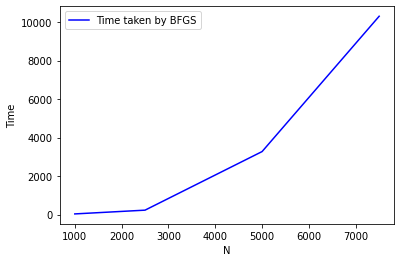

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n1 , time_taken ,color = "blue")
plt.legend(["Time taken by BFGS"])
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

The graph is increasing with increasing value of n.